# Improving Computer Vision Accuracy using Convolutions

In the previous lessons you saw how to do fashion recognition using a Deep Neural Network (DNN) containing three layers -- the input layer (in the shape of the data), the output layer (in the shape of the desired output) and a hidden layer. You experimented with the impact of different sized of hidden layer, number of training epochs etc on the final accuracy.

For convenience, here's the entire code again. Run it and take a note of the test accuracy that is printed out at the end. 

# 利用卷积提高计算机视觉精度

在前几节课中，你看到了如何使用包含三层的深度神经网络（DNN）进行时Fashion MNIST图像识别--输入层（根据输入数据的形状）、输出层（根据类别数量）和一个隐藏层。你实验了不同大小的隐藏层、训练次数等对最终精度的影响。

为了方便起见，这里又提供了完整的代码。运行它，记下最后打印出来的测试精度。

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

Your accuracy is probably about 89% on training and 87% on validation...not bad...But how do you make that even better? One way is to use something called Convolutions. I'm not going to details on Convolutions here, but the ultimate concept is that they narrow down the content of the image to focus on specific, distinct, details. 

If you've ever done image processing using a filter (like this: https://en.wikipedia.org/wiki/Kernel_(image_processing)) then convolutions will look very familiar.

In short, you take an array (usually 3x3 or 5x5) and pass it over the image. By changing the underlying pixels based on the formula within that matrix, you can do things like edge detection. So, for example, if you look at the above link, you'll see a 3x3 that is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has the edges enhanced.

This is perfect for computer vision, because often it's features that can get highlighted like this that distinguish one item for another, and the amount of information needed is then much less...because you'll just train on the highlighted features.

That's the concept of Convolutional Neural Networks. Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focussed, and possibly more accurate.

Run the below code -- this is the same neural network as earlier, but this time with Convolutional layers added first. It will take longer, but look at the impact on the accuracy:

你的训练准确率大概是89%，测试准确率大概是87%......还不错......但是如何让它变得更好呢？一种方法是使用一种叫做Convolutions的方法。这里不打算纠结于卷积的细节，而想抓住它的核心思路，即通过卷积操作缩小了图像的内容，将模型注意力集中在图像特定的、明显的特征上。

如果你曾经使用滤镜进行过图像处理（比如：https://en.wikipedia.org/wiki/Kernel_(image_processing)），那么convolutions看起来会非常熟悉。

简而言之，如果取一个二维数组（通常是3x3或5x5）并将其应用到图像上。通过根据该矩阵内的公式改变底层像素，就可以进行图像边缘检测等工作。例如上面的链接，会看到一个3x3的矩阵，它是为边缘检测而定义的，其中间的单元格是8，而所有相邻单元格都是-1。在这种情况下，对于每个像素，把它的值乘以8，然后减去它周边像素的值（因为每个都乘了-1）。扫描整个图像，对每个像素都这样做，最终会得到一张边缘被增强的新图像。

这种计算对于计算机视觉来说是非常理想的，因为通常情况下，能够像这样被突出显示的特征才是区分一个物品和另一个物品的关键。卷积使得所需要的信息量会少很多......因为只需要对突出显示的特征进行训练。

这就是卷积神经网络的概念。在全连接层之前，增加一些层来做卷积，那么输入全连接层的信息就会更加集中，也可能更加准确。

运行下面的代码--这和前面的神经网络是一样的，但这次先加了卷积层。这会花费较长的时间，但看看对精度的影响。


In [1]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


/Users/raven/Documents/devlop/all_in_ai/ml_learn/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


2.15.0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)         

It's likely gone up to about 93% on the training data and 91% on the validation data. 

That's significant, and a step in the right direction!

Try running it for more epochs -- say about 20, and explore the results! But while the results might seem really good, the validation results may actually go down, due to something called 'overfitting' which will be discussed later. 

(In a nutshell, 'overfitting' occurs when the network learns the data from the training set really well, but it's too specialised to only that data, and as a result is less effective at seeing *other* data. For example, if all your life you only saw red shoes, then when you see a red shoe you would be very good at identifying it, but blue suade shoes might confuse you...and you know you should never mess with my blue suede shoes.)

Then, look at the code again, and see, step by step how the Convolutions were built:

模型在训练数据上的精度可能上升到93%左右，在验证数据上可能上升到91%。

这是朝着正确方向取得的显著进步!

试着运行更多的epochs--比如20个epochs，然后观察结果! 虽然结果可能看起来非常好，但实际上验证结果可能会下降，这是因为"过拟合"造成的，后面将会讨论。

(简而言之，'过拟合'发生在网络模型从训练集中学习到的结果非常好，但它太狭隘了，只能识别训练数据，而在看到*其他*数据时效果不佳。举个例子，如果你一辈子只看到红色的鞋子，那么当你看到一双蓝色的麂皮鞋可能会感到迷惑......再举一例，应试教育往往使得学生只对做过的题目有很好的正确率，但对真实的问题却错误率很高）

接下来，观察程序代码，看看卷积模型是如何一步步建立的。

Step 1 is to gather the data. You'll notice that there's a bit of a change here in that the training data needed to be reshaped. That's because the first convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1, and the same for the test images. If you don't do this, you'll get an error when training as the Convolutions do not recognize the shape. 

第一步是收集数据。你会注意到，这里和之前有一点变化，训练数据需要改变维度（shape）。这是因为第一次卷积期望一个包含所有数据的单一张量，所以要把训练数据设置为60000x28x28x1的一个4D列表，测试图像也是如此处理。如果不这样做，会在训练时得到一个错误，因为卷积操作将不能识别数据形状。

•	为什么需要 reshape？
卷积神经网络期望输入数据是 4D 张量，因为它的操作需要了解以下四个维度：
1.	样本数（batch size）：每次训练/测试处理的图片数量。这里的样本数为 60000（训练集）或 10000（测试集）。
2.	高度（height）：图片的垂直像素数，固定为 28。
3.	宽度（width）：图片的水平像素数，固定为 28。
4.	通道数（channels）：对于灰度图像，只有一个通道，所以是 1。如果是 RGB 图像，通道数是 3。

```
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
```



Next is to define your model. Now instead of the input layer at the top, you're going to add a Convolution. The parameters are:

1. The number of convolutions you want to generate. Purely arbitrary, but good to start with something in the order of 32
2. The size of the Convolution, in this case a 3x3 grid
3. The activation function to use -- in this case we'll use relu, which you might recall is the equivalent of returning x when x>0, else returning 0
4. In the first layer, the shape of the input data.

You'll follow the Convolution with a MaxPooling layer which is then designed to compress the image, while maintaining the content of the features that were highlighted by the convlution. By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one, thus turning 4 pixels into 1. It repeats this across the image, and in so doing halves the number of horizontal, and halves the number of vertical pixels, effectively reducing the image by 25%.

You can call model.summary() to see the size and shape of the network, and you'll notice that after every MaxPooling layer, the image size is reduced in this way. 

接下来是定义模型。首先要添加一个卷积层。参数是

1. 你想要生成的卷积数（过滤器数量）。这个数值是任意的，但最好是从32开始的倍数。
2. 卷积的大小（过滤器的大小），在本例中为3x3网格。这是最常用的尺寸。
3. 要使用的激活函数 -- 在本例中，我们将使用relu，你可能还记得它相当于当x>0时返回x，否则返回0。
4. 在第一层，设定输入数据的形状。

在卷积层之后加上一个MaxPooling层，用来压缩图像，同时保持卷积所强调的特征内容。通过为MaxPooling指定(2,2)，效果是将图像的大小缩小四分之一。它的想法是创建一个2x2的像素数组，然后选取最大的一个，从而将4个像素变成1个，在整个图像中重复这样做，这样做的结果是将水平像素的数量减半，垂直像素的数量减半，有效地将图像缩小25%。

可以调用model.summary()来查看网络的大小和形状，你会注意到，每一个MaxPooling（池化）层之后，图像的大小都会以这种方式减少为原来的1/4。

卷积层参数解析

1.	32 (过滤器数量)：
	- 每个过滤器会从输入图像中提取不同的特征。
	- 通常选用 2^n 的数量（如 32、64、128），因为它们与硬件计算的效率优化有关。
	-	32 表示此卷积层会生成 32 个特征图。
2.	(3,3) (过滤器大小)：
	-	表示每个过滤器是 3 \times 3 的网格，最常用的过滤器尺寸。
	-	较小的过滤器可以捕获更细微的特征。
3.	activation='relu' (激活函数)：
	-	ReLU (Rectified Linear Unit) 是最常用的激活函数：
	f(x) = \max(0, x)
	-	它让网络更擅长捕捉非线性特征，同时避免梯度消失问题。
4.	input_shape=(28, 28, 1)：
	-	仅在网络的第一层指定输入数据的形状。
	-	输入为 28 \times 28 的灰度图像，所以通道数为 1。


MaxPooling层参数解析
1.	(2, 2) (池化窗口大小)：
	-	在 2 \times 2 的区域中选择最大值。
	-	池化窗口每次滑动 2 个像素（默认步幅等于窗口大小）。
2.	效果：
	-	输入特征图的高度和宽度减半，大小减少为原来的 1/4。
	-	例如：如果输入特征图是 28 \times 28 \times 32，池化后变成 14 \times 14 \times 32。
```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
```



Add another convolution

再增加一个卷积层和MaxPooling2D


```
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2)
```



Now flatten the output. After this you'll just have the same DNN structure as the non convolutional version

现在对输出进行扁平化处理。在这之后，你将拥有与非卷积版本相同的DNN结构，即全连接神经元网络。

```
  tf.keras.layers.Flatten(),
```



The same 128 dense layers, and 10 output layers as in the pre-convolution example:

含有128个神经元的全连接层，以及10个神经元的输出层。

```
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
```



Now compile the model, call the fit method to do the training, and evaluate the loss and accuracy from the test set.

现在编译模型，调用model.fit方法做训练，接着用测试集评估损失和准确率。

```
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)
```




# Visualizing the Convolutions and Pooling

This code will show us the convolutions graphically. The print (test_labels[;100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

# 将卷积和池化的结果可视化

这段代码将以图形方式向我们展示卷积的结果。print(test_labels[;100])向我们展示了测试集中的前100个标签，你可以看到索引0、索引23和索引28的标签都是相同的值（9），它们都是鞋子。让我们来看看对图像做卷积操作的结果，会看到它们之间的共同特征出现。之后，当DNN在该数据上进行训练时，模型训练的工作内容就少了很多，模型会在卷积/池化的基础上找到鞋子图像的共性。

In [ ]:
print(test_labels[:100])
_ = model.predict(test_images) 

1/1 [==============================] - 0s 11ms/step


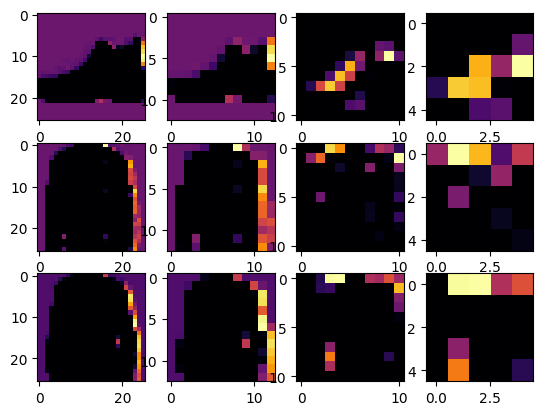

In [3]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

EXERCISES

1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it. 

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

练习

1. 尝试修改卷积层参数。将32改为16或64。这对准确度和/或训练时间有什么影响？

2. 删除最后的卷积层。这将对精度或训练时间产生什么影响？

3. 增加更多的卷积层会有什么影响？实验一下吧。

4. 除第一项外，删除所有的Convolutions。这样做会有什么影响？请完成实验。

5. 在上一节课中，实现了通过一个回调函数来检查模型的损失，并在损失减小到一定量时取消训练。看看是否能在这里实现？

In [ ]:
# test1 
# 1. 尝试修改卷积层参数。将32改为16或64。这对准确度和/或训练时间有什么影响？
# 16层  10次 10s 313/313 [==============================] - 1s 2ms/step - loss: 0.0387 - accuracy: 0.9892
# 16层  5次  10s 313/313 [==============================] - 1s 2ms/step - loss: 0.0364 - accuracy: 0.9883
# 32层  5次  15s 313/313 [==============================] - 1s 3ms/step - loss: 0.0307 - accuracy: 0.9898
# 64层  5次  20s 313/313 [==============================] - 1s 4ms/step - loss: 0.0310 - accuracy: 0.9913
# 随着卷积层数的增加，准确率会越来越高，但时间会越来越长。

import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.15.0
Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1420 - accuracy: 0.9564
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0469 - accuracy: 0.9852
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0327 - accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0242 - accuracy: 0.9921
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0307 - accuracy: 0.9898
0.989799976348877


In [ ]:
# test2
# 2. 删除最后的卷积层。这将对精度或训练时间产生什么影响？
# 32层 two  15s 313/313 [==============================] - 1s 3ms/step - loss: 0.0307 - accuracy: 0.9898
# 32层 one 11s 313/313 [==============================] - 1s 2ms/step - loss: 0.0406 - accuracy: 0.9871
# 16层 two 10s 313/313 [==============================] - 1s 2ms/step - loss: 0.0364 - accuracy: 0.9883
# 16层 one 8s  313/313 [==============================] - 0s 1ms/step - loss: 0.0453 - accuracy: 0.9853
# 删除最后的卷积层，训练时间会减少，精度会降低。 
# ps ：可以测试删除后的模型精度变化，如果精度仍然能够满足需求且训练时间显著减少，这是一个不错的优化方案

# test 3
# 3. 增加更多的卷积层会有什么影响？实验一下吧。
# 32层 three 13s 313/313 [==============================] - 1s 2ms/step - loss: 0.0520 - accuracy: 0.9843
# 16层 three 8s  313/313 [==============================] - 1s 2ms/step - loss: 0.0757 - accuracy: 0.9770
#	对 复杂数据集：增加卷积层通常有助于提高模型的表达能力和精度。
# 对 简单数据集（如 MNIST）：三层卷积可能过度复杂，效果提升有限，甚至增加过拟合风险。此时可以通过实验验证是否值得增加复杂性。

import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.15.0
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1685 - accuracy: 0.9508
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0582 - accuracy: 0.9820
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0394 - accuracy: 0.9877
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0260 - accuracy: 0.9918
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0453 - accuracy: 0.9853
0.9853000044822693


In [ ]:
# test4
# 4.除第一项外，删除所有的Convolutions。这样做会有什么影响？请完成实验。
# 313/313 [==============================] - 1s 2ms/step - loss: 0.0567 - accuracy: 0.9854
#	•	适用于简单数据集：
# 对于 MNIST，这种简化模型可能在精度和训练时间之间达到一个较好的平衡。
#	•	不适用于复杂数据集：
# 对于需要更复杂特征提取的任务，移除所有卷积层会显著降低模型性能。
#	•	实际结果建议实验验证：
# 可以测试模型在训练集和测试集上的表现，如果精度下降幅度在可接受范围内且训练时间明显减少，这种修改可能是有意义的。
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.15.0
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1470 - accuracy: 0.9553
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0458 - accuracy: 0.9855
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0246 - accuracy: 0.9925
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0133 - accuracy: 0.9955
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0567 - accuracy: 0.9854
0.9854000210762024


In [17]:
# test
# 5. 在上一节课中，实现了通过一个回调函数来检查模型的损失，并在损失减小到一定量时取消训练。看看是否能在这里实现？

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs={}):
    if (logs.get('accuracy')>0.99):
      print(' accuracy is > 0.99')
      self.model.stop_training = True

import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

myCallback = myCallback()
model.fit(training_images, training_labels, epochs=5, callbacks=[myCallback])
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.15.0
Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1486 - accuracy: 0.9554
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0495 - accuracy: 0.9854
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0333 - accuracy: 0.9897
Epoch 4/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0335 - accuracy: 0.9889
0.9889000058174133
